In [1]:
from IPython import display
import numpy as np

# load netcdf files directly via xarray
import xarray as xr
import matplotlib.pyplot as plt


In [2]:
###########################
## LOAD ERAI data: daily ##
###########################

# load eraionmpi
#mndays = 11688      # 1979-2010

# # 1980-2016 
# mstart = 365
# mndays = 13515    

# 1979-2018 
mstart = 0
mndays = 14610       


mnvars = 8*1
mdv1 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/U850.ERAI.MPIGRID.1979-2018.nc')['U'][mstart:mstart+mndays*1]
mdv2 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/V850.ERAI.MPIGRID.1979-2018.nc')['V'][mstart:mstart+mndays*1]
mdv3 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/Q850.ERAI.MPIGRID.1979-2018.nc')['Q'][mstart:mstart+mndays*1]
mdv4 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/T700.ERAI.MPIGRID.1979-2018.nc')['T'][mstart:mstart+mndays*1]
mdv5 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/Z700.ERAI.MPIGRID.1979-2018.nc')['Z'][mstart:mstart+mndays*1]
mdv6 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/Z500.ERAI.MPIGRID.1979-2018.nc')['Z'][mstart:mstart+mndays*1]
mdv7 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/U250.ERAI.MPIGRID.1979-2018.nc')['U'][mstart:mstart+mndays*1]
mdv8 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/V250.ERAI.MPIGRID.1979-2018.nc')['V'][mstart:mstart+mndays*1]

print("Days loaded", len(mdv7))

# Find min/max for each variable
mv1max = mdv1.max(); mv1min = mdv1.min()
mv2max = mdv2.max(); mv2min = mdv2.min()
mv3max = mdv3.max(); mv3min = mdv3.min()
mv4max = mdv4.max(); mv4min = mdv4.min()
mv5max = mdv5.max(); mv5min = mdv5.min()
mv6max = mdv6.max(); mv6min = mdv6.min()
mv7max = mdv7.max(); mv7min = mdv7.min()
mv8max = mdv8.max(); mv8min = mdv8.min()
# print("mv1 max/min", mv1max, mv1min)
# print("mv2 max/min", mv2max, mv2min)
# print("mv3 max/min", mv3max, mv3min)
# print("mv4 max/min", mv4max, mv4min)
# print("mv5 max/min", mv5max, mv5min)
# print("mv6 max/min", mv6max, mv6min)
# print("mv7 max/min", mv7max, mv7min)
# print("mv8 max/min", mv8max, mv8min)


Days loaded 14610


In [3]:
##################
## LOAD GRIDMET ##
##################
# # 1980-1989
# istart = 365
# ndays = 3653  

# # 1980-2016 
# istart = 365
# ndays = 13515 

# 1979-2016
istart = 0
ndays = 13880       

# load files
dv1 = xr.open_dataset('/glade/work/dkorytin/srgan_data/prec128_gridmetA_1979-2016.nc')['prec'][istart:istart+ndays]
dv2 = xr.open_dataset('/glade/work/dkorytin/srgan_data/tmax128_gridmetA_1979-2016.nc')['tmax'][istart:istart+ndays]
dv3 = xr.open_dataset('/glade/work/dkorytin/srgan_data/tmin128_gridmetA_1979-2016.nc')['tmin'][istart:istart+ndays]
dv4 = xr.open_dataset('/glade/work/dkorytin/srgan_data/uas128_gridmetA_1979-2016.nc')['uas'][istart:istart+ndays]
dv5 = xr.open_dataset('/glade/work/dkorytin/srgan_data/vas128_gridmetA_1979-2016.nc')['vas'][istart:istart+ndays]
dv6 = xr.open_dataset('/glade/work/dkorytin/srgan_data/huss128_gridmetA_1979-2016.nc')['huss'][istart:istart+ndays]
dv7 = xr.open_dataset('/glade/work/dkorytin/srgan_data/rsds128_gridmetA_1979-2016.nc')['rsds'][istart:istart+ndays]
dv8 = xr.open_dataset('/glade/work/dkorytin/srgan_data/miss128_gridmetB_1979-2016.nc')['miss'][istart:istart+ndays]


In [54]:
def plot_uatm1234(ii):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(14,2))
    mdv1[ii].plot(ax=ax1)
    mdv2[ii].plot(ax=ax2)
    mdv3[ii].plot(ax=ax3)
    mdv4[ii].plot(ax=ax4)

def plot_gridmet1234(ii):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(14,2))
    dv1[ii].plot(ax=ax1)
    dv2[ii].plot(ax=ax2)
    dv3[ii].plot(ax=ax3)
    dv4[ii].plot(ax=ax4)
    
# plot average rain inputs
def plot_8v(isample):
    varmames = ['U850', 'V850', 'Q850', 'T700', 'Z700', 'Z500', 'U250', 'V250']
    units = ['m/s', 'm/s', 'kg/kg', 'K', 'mb', 'mb', 'm/s', 'm/s']
    fig, axarr = plt.subplots(1, 8, figsize = (20,20))
    for ii in range(8):
        plot = axarr[ii].imshow(isample[ii])
        cbar = fig.colorbar(plot, ax=axarr[ii], orientation="horizontal", fraction=0.046, pad=0.016)
        cbar.set_label(units[ii])
        axarr[ii].set_title(varmames[ii])
    plt.show()

# plot_gridmet1234(1132)
# plot_gridmet1234(3690)


# Similarity > 0.925

In [5]:
# load similarity matrix
sm = np.load('/glade/scratch/dkorytin/erai-on-mpigrid/SSIM.ERAI.MPIGRID.1979-2018.npy')
similar = np.where((sm > .925) & (sm < 1))

In [6]:
# rain or not?
print ("nn, ii, jj, sm[ii][jj], mpr(ii), mpr(jj)")
for nn in range(len(similar[0])):
    ii = similar[0][nn]
    jj = similar[1][nn]
    if ii<ndays and jj<ndays:
        mpr1 = dv1[ii].sel(lat=slice(32.125,38.125), lon=slice(-101.875,-93.875)).mean()
        mpr2 = dv1[jj].sel(lat=slice(32.125,38.125), lon=slice(-101.875,-93.875)).mean()
        print (nn, ii, jj, sm[ii][jj], float(mpr1), float(mpr2))
    

nn, ii, jj, sm[ii][jj], mpr(ii), mpr(jj)
0 1861 13553 0.9269436597824097 0.027166377753019333 0.0
1 5733 5734 0.9250305891036987 0.016506578773260117 0.5087631940841675
2 5734 5733 0.9250305891036987 0.5087631940841675 0.016506578773260117
3 5734 5735 0.9283149242401123 0.5087631940841675 1.6283682584762573
4 5735 5734 0.9283149242401123 1.6283682584762573 0.5087631940841675
5 8424 12816 0.9329546689987183 3.315807819366455 4.7471923828125
6 9071 9072 0.9358282685279846 0.024645477533340454 0.07638582587242126
7 9072 9071 0.9358282685279846 0.07638582587242126 0.024645477533340454
8 12816 8424 0.9329546689987183 4.7471923828125 3.315807819366455
9 13553 1861 0.9269436597824097 0.0 0.027166377753019333


# averages: dry, moist, wet

In [7]:
###################
## UATM averages ##
###################

def calc_uatm_average(mpr_min, mpr_max):
    # global inputs: dv[1-8], mdv[1-8], mnvars
    
    # initialize accumulators
    indices = []
    distribution = []
    raw_ires = len(mdv1[0])
    raininput = np.zeros((mnvars, raw_ires, raw_ires))
    raincount = 0
    
    for ii in range(len(dv1)):
        mpr = dv1[ii].sel(lat=slice(32.125,38.125), lon=slice(-101.875,-93.875)).mean()
        if mpr["time.month"] == 5:    # May

            if mpr >= mpr_min and mpr < mpr_max:
                distribution.append(mpr)
                indices.append(ii)
                
                # find matching input sample 
                #mdv1.sel(time=ot,method='nearest')
                #isample = [mdv1.sel(time=ot,method='nearest'),mdv2.sel(time=ot,method='nearest'),mdv3.sel(time=ot,method='nearest'),mdv4.sel(time=ot,method='nearest'),mdv5.sel(time=ot,method='nearest'),mdv6.sel(time=ot,method='nearest'),mdv7.sel(time=ot,method='nearest'),mdv8.sel(time=ot,method='nearest')]
                isample = [mdv1[ii],mdv2[ii],mdv3[ii],mdv4[ii],mdv5[ii],mdv6[ii],mdv7[ii],mdv8[ii]]
                isample = np.array(isample)

                raininput += isample
                raincount += 1
            
                #print ("ii, mpr (mm/day)", ii, mpr, ot, mdv1.sel(time=ot,method='nearest')['time'])
                #print()

    raininput /= raincount
    print("days:", raincount)
    
    return raininput, raincount, distribution, indices
    
    


In [8]:
# calc average dry, moist, wet
dryinput, drycount, drydistribution, dryindices = calc_uatm_average(0, 0.254) 
moistinput, moistcount, moistdistribution, moistindices = calc_uatm_average(0.254, 3.0) 
wetinput, wetcount, wetdistribution, wetindices = calc_uatm_average(3.0, 9999.0) 


days: 287
days: 425
days: 466


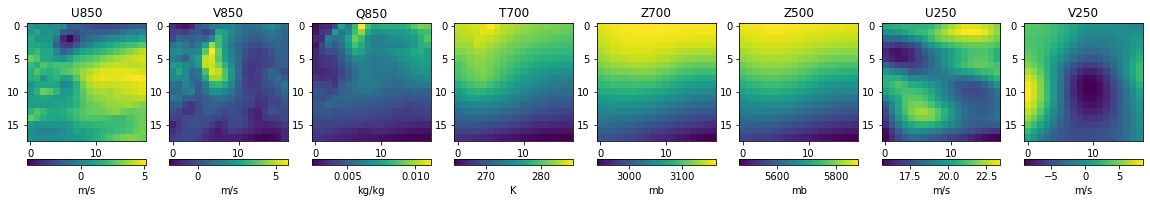

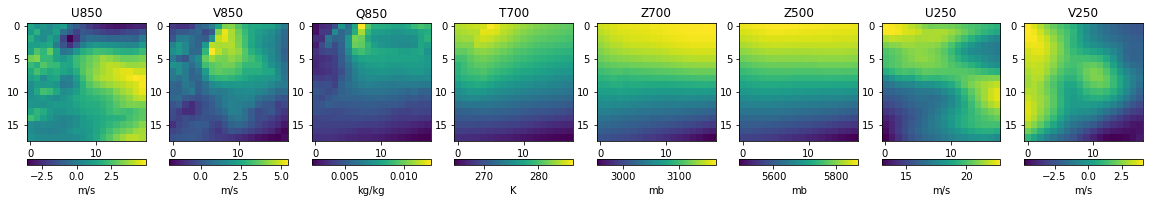

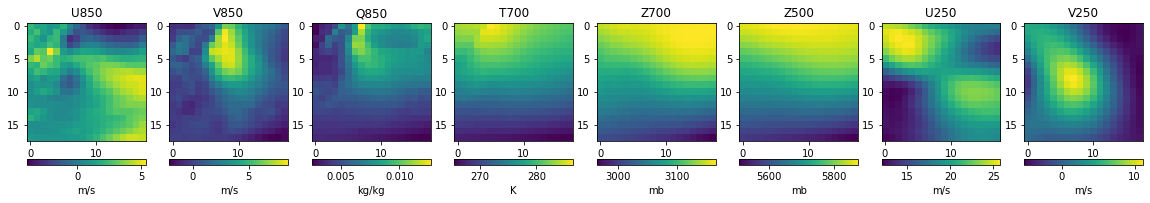

In [9]:
# plot average dry, moist, wet
plot_8v(dryinput)
plot_8v(moistinput)
plot_8v(wetinput)


In [10]:
# save these averages, for use by ssim_uatm_3class_distances.py
np.save('/glade/scratch/dkorytin/erai-on-mpigrid/SSIM-DRY.ERAI.MPIGRID.1979-2018.npy', dryinput) 
np.save('/glade/scratch/dkorytin/erai-on-mpigrid/SSIM-MOIST.ERAI.MPIGRID.1979-2018.npy', moistinput) 
np.save('/glade/scratch/dkorytin/erai-on-mpigrid/SSIM-WET.ERAI.MPIGRID.1979-2018.npy', wetinput) 



# Histograms: SSIM distance to {dry, moist, wet}

In [11]:
ssim_matrix2 = np.load('/glade/scratch/dkorytin/erai-on-mpigrid/SSIM-3C.ERAI.MPIGRID.1979-2018.npy')


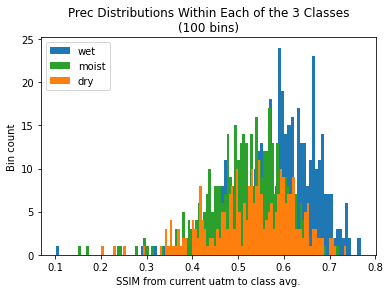

In [12]:
# Prec Distributions Within Each of the 3 Classes
plt.hist(ssim_matrix2[2][wetindices], density=False, bins=100, label='wet', color="tab:blue")
plt.hist(ssim_matrix2[1][moistindices], density=False, bins=100, label='moist', color="tab:green")
plt.hist(ssim_matrix2[0][dryindices], density=False, bins=100, label='dry', color="tab:orange")
plt.title("Prec Distributions Within Each of the 3 Classes\n(100 bins)");
plt.ylabel('Bin count')
plt.xlabel('SSIM from current uatm to class avg.');
plt.legend(loc="upper left")

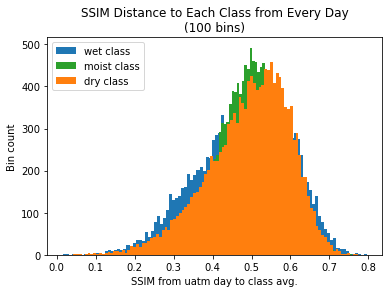

In [13]:
# all
plt.hist(ssim_matrix2[2], density=False, bins=100, label='wet class', color="tab:blue")
plt.hist(ssim_matrix2[1], density=False, bins=100, label='moist class', color="tab:green")
plt.hist(ssim_matrix2[0], density=False, bins=100, label='dry class', color="tab:orange")
plt.title("SSIM Distance to Each Class from Every Day\n(100 bins)");
plt.ylabel('Bin count')
plt.xlabel('SSIM from uatm day to class avg.');
plt.legend(loc="upper left")

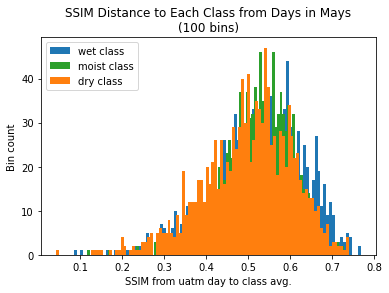

In [14]:
# just May's
mays = np.where(dv1["time.month"] == 5)   # only days that are in May
plt.hist(ssim_matrix2[2][mays], density=False, bins=100, label='wet class', color="tab:blue")
plt.hist(ssim_matrix2[1][mays], density=False, bins=100, label='moist class', color="tab:green")
plt.hist(ssim_matrix2[0][mays], density=False, bins=100, label='dry class', color="tab:orange")
plt.title("SSIM Distance to Each Class from Days in Mays\n(100 bins)");
plt.ylabel('Bin count')
plt.xlabel('SSIM from uatm day to class avg.');
plt.legend(loc="upper left")

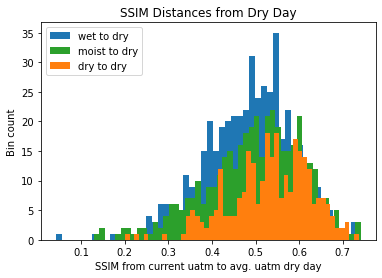

In [15]:
# ssim distances from dry avg: wet(blue) vs dry(orange) 
plt.hist(ssim_matrix2[0][wetindices], density=False, bins=50, label="wet to dry", color="tab:blue")
plt.hist(ssim_matrix2[0][moistindices], density=False, bins=50, label="moist to dry", color="tab:green")
plt.hist(ssim_matrix2[0][dryindices], density=False, bins=50, label="dry to dry", color="tab:orange")
plt.title("SSIM Distances from Dry Day");
plt.ylabel('Bin count')
plt.xlabel('SSIM from current uatm to avg. uatm dry day');
plt.legend(loc="upper left")

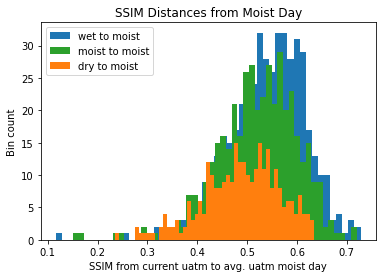

In [16]:
# ssim distances from moist avg: wet(blue) vs dry(orange) 
plt.hist(ssim_matrix2[1][wetindices], density=False, bins=50, label="wet to moist", color="tab:blue")
plt.hist(ssim_matrix2[1][moistindices], density=False, bins=50, label="moist to moist", color="tab:green")
plt.hist(ssim_matrix2[1][dryindices], density=False, bins=50, label="dry to moist", color="tab:orange")
plt.title("SSIM Distances from Moist Day");
plt.ylabel('Bin count')
plt.xlabel('SSIM from current uatm to avg. uatm moist day');
plt.legend(loc="upper left")

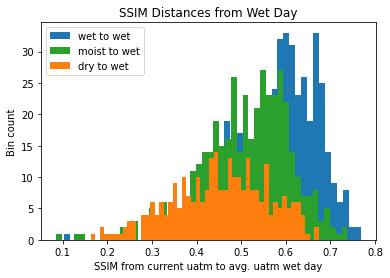

In [17]:
# ssim distances from wet avg: wet(blue) vs dry(orange) 
plt.hist(ssim_matrix2[2][wetindices], density=False, bins=50, label="wet to wet", color="tab:blue")
plt.hist(ssim_matrix2[2][moistindices], density=False, bins=50, label="moist to wet", color="tab:green")
plt.hist(ssim_matrix2[2][dryindices], density=False, bins=50, label="dry to wet", color="tab:orange")
plt.title("SSIM Distances from Wet Day");
plt.ylabel('Bin count')
plt.xlabel('SSIM from current uatm to avg. uatm wet day');
plt.legend(loc="upper left")

# rain scatter plots

In [18]:
r2 = [dv1[ii].sel(lat=slice(32.125,38.125), lon=slice(-101.875,-93.875)).mean() for ii in range(len(dv1))]


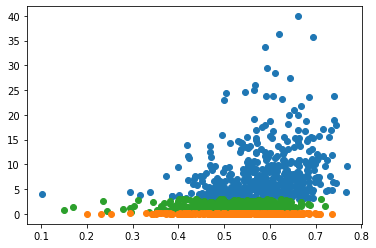

In [19]:
plt.scatter(ssim_matrix2[2][wetindices], np.array(r2)[wetindices], color="tab:blue")
plt.scatter(ssim_matrix2[1][moistindices], np.array(r2)[moistindices], color="tab:green", )
plt.scatter(ssim_matrix2[0][dryindices], np.array(r2)[dryindices], color="tab:orange")


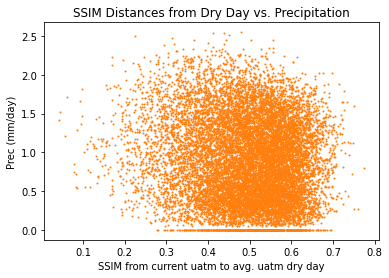

In [20]:
# dry
allindices = range(len(dv1))
plt.scatter(ssim_matrix2[0][allindices], np.array(r2)[allindices]**.25, color="tab:orange", s=1)
plt.title("SSIM Distances from Dry Day vs. Precipitation");
plt.ylabel('Prec (mm/day)')
plt.xlabel('SSIM from current uatm to avg. uatm dry day');
#plt.legend(loc="upper left")

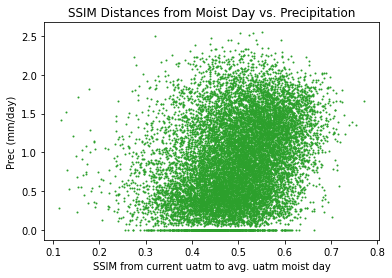

In [21]:
# moist
allindices = range(len(dv1))
plt.scatter(ssim_matrix2[1][allindices], np.array(r2)[allindices]**.25, color="tab:green", s=1)
plt.title("SSIM Distances from Moist Day vs. Precipitation");
plt.ylabel('Prec (mm/day)')
plt.xlabel('SSIM from current uatm to avg. uatm moist day');


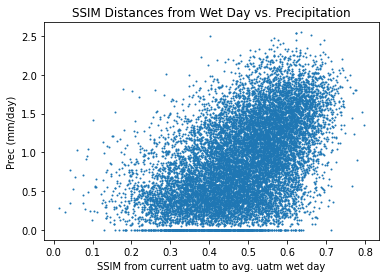

In [22]:
# wet
allindices = range(len(dv1))
plt.scatter(ssim_matrix2[2][allindices], np.array(r2)[allindices]**.25, color="tab:blue", s=1)
plt.title("SSIM Distances from Wet Day vs. Precipitation");
plt.ylabel('Prec (mm/day)')
plt.xlabel('SSIM from current uatm to avg. uatm wet day');


# dry days with similarity to wet average


In [42]:
# most similar days to wet day average
wv = ssim_matrix2[2][0:len(r2)]
ii = np.where((wv > .71) & (wv < 1))
jj = [float(r2[xx]) for xx in ii[0]]
top = sorted(zip(jj,ii[0]))

In [45]:
# dryest 2
top[0:2]


[(0.0, 10191), (0.01787608675658703, 12128)]

In [47]:
top[0][1]

10191

average wet day


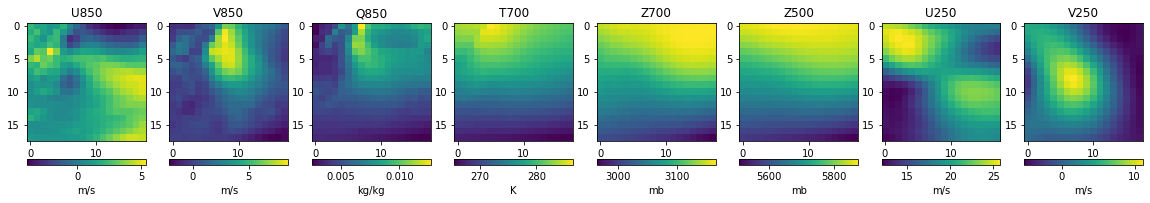

rain (mm/day) 0.0


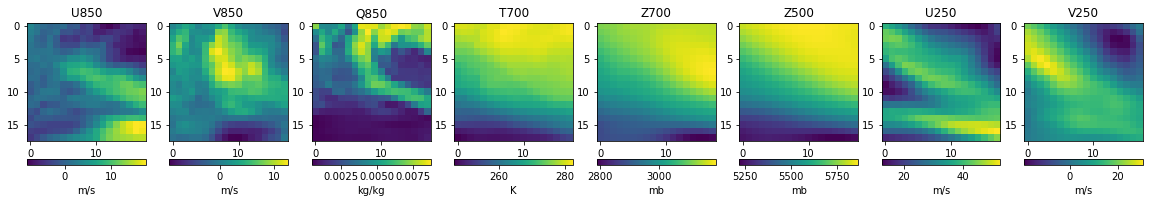

rain (mm/day) 0.01787608675658703


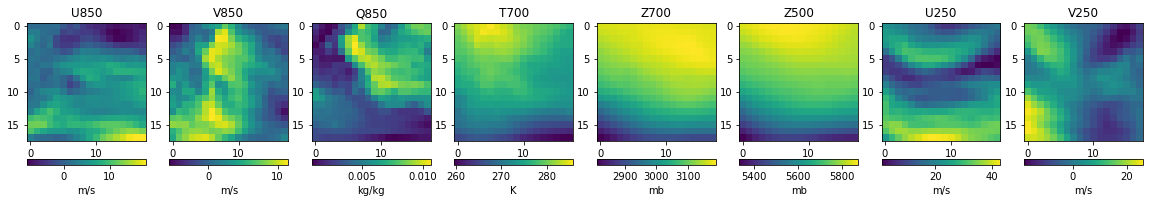

In [59]:
# plot 

print("average wet day")
plot_8v(wetinput)

for jj in range(2):
    ii = top[jj][1]
    rain = top[jj][0]
    isample = [mdv1[ii],mdv2[ii],mdv3[ii],mdv4[ii],mdv5[ii],mdv6[ii],mdv7[ii],mdv8[ii]]
    #isample = np.array(isample)
    print("rain (mm/day)", rain)
    plot_8v(isample)
